# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [X] YES - make available
* [ ] NO - keep private

# Overview

Yelp has normalized the reviewing of businesses. This system has benefited its users by allowing them to read on other people’s experiences and opinions, along with updating them on the business’s amenities. This can be either problematic or valuable to businesses. It allows them to receive feedback on how to improve their business and either attracts or dissuades potential customers. In the modern day, Yelp tends to play a factor in and reflect a business’s success. Our project analyzes Yelp data to determine the effects of a business’s location on a business’s success (based off the area and environment it is in). This analysis is used to determine the likelihood of a business’s success based on the location it is set up in. 

# Names

- Shih Wen Ma
- Andrea Diaz
- Viet Nguyen
- Manda Tran
- Matthew Luu

# Group Members IDs

- A15469802
- A15084975
- A13702483
- A14452168
- A16067866

# Research Question

How does the state a restaurant is located in (specifically the United States) affect the success of restaurants? Can you predict a restaurant’s success based on the location?

## Background and Prior Work

Yelp is an online service in which anyone with an account can comment on and/or rate a business. It allows users to make informed decisions on whether or not they want to receive services from them. For businesses, it is a platform for them to receive feedback on their services, such as what customers would like to see and what improvements they can make. This platform is used by both sides to gauge how successful and/or promising a business is. As such, we focus on Yelp data to help us determine the success of a restaurant (determined by ratings and number of reviews) based on location. 

When evaluating whether a Yelp data set is the most appropriate for our question, we analyzed the credibility and bias of the dataset. We researched possible factors that could affect the accuracy of the dataset in reflecting the success of a restaurant. One major question we asked is: “Is the data corrupt?”. Upon further research, we found that Yelp does manipulate reviews. They filter out data that they think are fake, but this algorithm is not always correct. The filter affects the success because it is manipulating the data, thus removing data that could potentially affect the ratings of the business. In addition, they accept payments from businesses to advertise for them and/or hide bad reviews while highlighting more favorable ones. This would skew the data because it means that restaurants who pay Yelp to do this are more likely to receive more customers and reviews, thus making the business (seem) more successful than its competitors. Another major aspect we considered was how the bandwagon effect could affect the ratings of a restaurant. We found that current ratings do affect future ratings, which further cements the skew of the data. This affects small businesses, as they are often overshadowed by larger businesses who have the resources to pay Yelp for advertisements and extra services. 

We have decided to move forward with using the Yelp dataset with these concerns in mind. We concluded that while these factors may affect the accuracy in reflecting the success of a restaurant, they also affect the success of the restaurant. These factors change the way the business is reflected through Yelp, a popular platform used by people to determine whether or not they want to utilize the business’s services. By playing a role in a potential customer’s choice in utilizing the service, Yelp indirectly affects the success of the restaurant. Therefore, it is safe to continue using the Yelp dataset, given that these factors also influence the restaurant’s success. 

While doing initial research on Yelp dataset, we came across the Yelp Dataset Challenge. We noticed 2-3 projects that had to do with predicting the success of a business. For example, one project predicted success based on the text in the reviews which were analyzed based on sentiment (reference #5) using machine learning models. However, we could not find any projects or reports that looked into the effect of different locations on the ratings of restaurants which is why we thought it would be an interesting topic to focus on. 

References (include links):
- 1) The Yelp Review Filter: https://vivial.net/blog/how-to-avoid-the-yelp-review-filter-and-get-more-positive-reviews/
- 2) The Yelp Effect https://rbj.rady.ucsd.edu/index.php/topics/social-impact/2014/01/the-yelp-effect/
- 3) Fake Yelp Reviews
    - https://smallbusiness.yahoo.com/advisor/writing-fake-reviews-yelp-might-sued-173135209.html
    - https://www.businessinsider.com/20-percent-of-yelp-reviews-fake-2013-9
- 4) The Yelp Factor https://hbswk.hbs.edu/item/the-yelp-factor-are-consumer-reviews-good-for-business
- 5) Yelp Dataset Challenge 1 https://github.com/VC444/Yelp-Dataset-Challenge 

# Hypothesis


Location will have a large effect on the rating because it sets up the environment and customer expectations the business needs to fulfill. The most popular type of food in a specific area will be set at a higher standard by the consumers and therefore have harsher ratings. For example, we believe that if Mexican food is very popular in San Diego, then Chipotle chain restaurants, known for its Mexican-style cuisine, will generally have lower ratings due to the fact that there are more local restaurants that specialize in Mexican food. Therefore, we will also place an emphasis on chain restaurants and compare our findings to local restaurants. 

# Dataset(s)

- **Dataset Name: Yelp Restaurant Data Across America**
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 1,024 observations

  The data was collected by using a Yelp API and the github repo: https://github.com/gfairchild/yelpapi. We ran a search query for each state and each of the top types of cuisine. The data contains average (non - fast food) restaurant ratings. The columns in the data containss the name of the restaurant, the location (including latitude and longitude), the average rating, the applicable categories, and the number of customer reviews.
  
| Column Name | Description |
|---|---|
|name|The name of the restaurant|
|coordinates|The latitude and longitude of the restaurant|
|category|List of dictionaries describing the categories the restaurant belongs to|
|location|The address of the restaurant|
|rating|The overall average rating of the restaurant|
|review_count|The number of reviews for the restaurant|
|state|The state the restaurant is in|


- **Dataset Name: Yelp Fast Food Restaurant Data Across America**
- Link to the dataset: https://www.yelp.com/developers/documentation/v3/business_search
- Number of observations: 11,220 observations

  The data was collected by using a Yelp API and the github repo: https://github.com/gfairchild/yelpapi. We ran a search query for each state for each restaurant that contained the category 'fast food.' The data contains the same variables for the columns as the Yelp Restaurant Data Across America data set.


- **Dataset Name: Fast Food Restaurants Across America**
- Link to the dataset: https://www.kaggle.com/datafiniti/fast-food-restaurants#FastFoodRestaurants.csv
- Number of observations: 10,000 observations

  This dataset provides information about 10,000 fast food restaurants across America. The data was collected from Datafiniti's Business Database in March 2018. We are using this dataset to understand which fast food chains are the most popular across the US (per state) based on the number of locations. While the data comes from a reliable source, the completion of the dataset is cannot be confirmed because there was no free option to download the data directly from the source so we had to download the data from kaggle.com. The data includes the fast food restaurant, its location, and website.

| Column Name | Description |
|---|---|
|address|the address of the restaurant|
|city|the city the restaurant is in|
|country|the country the restaurant is in|
|keys|identifier of the restaurant|
|latitude|latitude of the restaurant|
|longitude|longitude of the restaurant|
|name|the name of the restaurant|
|postal code|the postal code of the restaurant|
|province|the state the restaurant is in|
|website|the website of the restaurant|

# Setup

In [1]:
# uncomment below if not yet installed
#!pip install --user geopandas
#!pip install --user descartes

In [2]:
# import libraries
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import shapely.geometry as shp

Import dataframes from csv files

In [3]:
yelp_df = pd.read_csv('data/cuisine.csv')
fast_df = pd.read_csv('data/FastFoodRestaurants.csv')
fast_ratings_df = pd.read_csv('data/FastRatings.csv')

# Data Cleaning

Describe your data cleaning steps here.

In [4]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

In [5]:
#turns all name to lowercase so capitalization does not affect analysis
for i in yelp_df.index:
    yelp_df.at[i,'name'] = yelp_df.at[i,'name'].lower()
for j in fast_df.index:
    fast_df.at[j, 'name'] = fast_df.at[j, 'name'].lower()
for k in fast_ratings_df.index:
    fast_ratings_df.at[k, 'name'] = fast_ratings_df.at[k, 'name'].lower()

#### Clean data in the yelp_df

In [6]:
#Separate longitude and latitude information from coordinates column for the yelp_df
yelp_df['latitude'] = np.nan
yelp_df['longitude'] = np.nan
for i in yelp_df.index:
    coord = yelp_df.at[i, 'coordinates']
    yelp_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    yelp_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

yelp_df = yelp_df.drop('coordinates',axis=1)

In [7]:
#Separate address information from location column for the yelp_df
yelp_df['address'] = ''
for i in yelp_df.index:
    address = yelp_df.at[i, 'location']
    yelp_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

yelp_df = yelp_df.drop('location', axis=1)

In [8]:
#Drop unnamed column from yelp_df
yelp_df = yelp_df.drop(['Unnamed: 0'], axis=1)

In [9]:
# drop duplicate rows if there are any
yelp_df=yelp_df.drop_duplicates()
yelp_df=yelp_df.reset_index(drop=True)

In [10]:
yelp_df

,name,category,rating,review_count,state,latitude,longitude,address
0,el barrio,"[{'alias': 'mexican', 'title': 'Mexican'}]",4.5,618,AL,33.516636,-86.802849,2211 2nd Ave N
1,saw's soul kitchen,"[{'alias': 'bbq', 'title': 'Barbeque'}, {'alia...",4.5,783,AL,33.524190,-86.773830,215 41st St S
2,yo' mama's,"[{'alias': 'newamerican', 'title': 'American (...",4.5,355,AL,33.517660,-86.801830,2328 2nd Ave N
3,carrigan's public house,"[{'alias': 'cocktailbars', 'title': 'Cocktail ...",4.5,527,AL,33.517124,-86.798646,2430 Morris Ave
4,highlands bar & grill,"[{'alias': 'southern', 'title': 'Southern'}, {...",4.5,304,AL,33.500572,-86.795577,2011 11th Ave S
...,...,...,...,...,...,...,...,...
1019,wasabi japanese grill & bar,"[{'alias': 'japanese', 'title': 'Japanese'}, {...",3.5,118,WY,41.161270,-104.789620,4620 Grandview Ave
1020,l'osteria mondello,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,79,WY,41.159263,-104.804882,1507 Stillwater Ave
1021,destination taiwan,"[{'alias': 'bubbletea', 'title': 'Bubble Tea'}...",5.0,16,WY,41.160490,-104.776100,2634 Dell Range Blvd
1022,mort's bagels,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",4.5,46,WY,41.134658,-104.817705,1815 Carey Ave


#### Clean data in the fast_ratings_df

In [11]:
to_drop = []
for i in fast_ratings_df.index:
    if ("'country': 'US'" in fast_ratings_df['location'][i]):
        continue
    else:
        to_drop.append(i)
fast_ratings_df = fast_ratings_df.drop(to_drop)
fast_ratings_df['state'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [12]:
fast_ratings_df['state'].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [13]:
#Separate longitude and latitude information from coordinates column for the fast_ratings_df
fast_ratings_df['latitude'] = np.nan
fast_ratings_df['longitude'] = np.nan
for i in fast_ratings_df.index:
    coord = fast_ratings_df.at[i, 'coordinates']
    fast_ratings_df.at[i, 'latitude'] = coord[coord.find(':') + 1 : coord.find(',')]
    fast_ratings_df.at[i, 'longitude'] = coord[coord.find(':', coord.find(',') + 1) + 1 : coord.find('}')]

fast_ratings_df = fast_ratings_df.drop('coordinates',axis=1)

In [14]:
#Separate address information from location column for the fast_ratings_df
fast_ratings_df['address'] = ''
for i in fast_ratings_df.index:
    address = fast_ratings_df.at[i, 'location']
    fast_ratings_df.at[i, 'address'] = address[address.find(':') + 3 : address.find(',') - 1]

fast_ratings_df = fast_ratings_df.drop('location', axis=1)

In [15]:
# Drop unnamed column from fast_ratings_df
fast_ratings_df = fast_ratings_df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)

In [16]:
# drop duplicate rows if there are any
fast_ratings_df=fast_ratings_df.drop_duplicates()
fast_ratings_df=fast_ratings_df.reset_index(drop=True)

In [17]:
fast_ratings_df

,name,category,rating,review_count,state,latitude,longitude,address
0,taco bell,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",5.0,4,NY,44.950268,-74.844363,1602 State Highway 37
1,mcdonald's,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",3.5,8,OH,39.523908,-83.458744,1401 Leesburg Ave
2,wendy's,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",2.5,5,OH,39.532787,-83.445862,530 Clinton Avenue
3,frisch's big boy,"[{'alias': 'burgers', 'title': 'Burgers'}, {'a...",3.5,15,KY,38.627340,-83.791582,408 Market Square Dr
4,lee's famous recipe chicken,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",5.0,3,KY,38.633732,-83.792804,Highway 68 S
...,...,...,...,...,...,...,...,...
4318,mcdonald's,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",2.0,12,MT,46.397796,-105.822041,1120 S Haynes
4319,wendy's,"[{'alias': 'hotdogs', 'title': 'Fast Food'}, {...",3.0,9,MT,46.405777,-105.822041,210 S. Haynes Ave
4320,pizza hut,"[{'alias': 'pizza', 'title': 'Pizza'}, {'alias...",3.5,4,MT,46.403074,-105.821939,3009 Stower St
4321,taco john's,"[{'alias': 'mexican', 'title': 'Mexican'}, {'a...",2.5,8,MT,46.399650,-105.822989,911 S Haynes St


#### Clean data in fast_df

In [19]:
# rename 'province' column to 'state' to match fast_ratings_df and yelp_df column names
fast_df = fast_df.rename(columns={'province':'state'})

# drop unnecessary columns
fast_df = fast_df.drop(['city','country','keys','postalCode','websites'], axis=1)
# reorder columns to resemble order of fast_ratings_df and yelp_df column order
fast_df = fast_df[['name', 'state', 'latitude', 'longitude', 'address']]

In [37]:
fast_df.head()

,name,state,latitude,longitude,address
0,mcdonald's,NY,44.92130,-74.89021,324 Main St
1,wendy's,OH,39.53255,-83.44526,530 Clinton Ave
2,frisch's big boy,KY,38.62736,-83.79141,408 Market Square Dr
3,mcdonald's,NY,44.95008,-74.84553,6098 State Highway 37
4,omg! rotisserie,OH,39.35155,-82.09728,139 Columbus Rd


#### List of top ten types of cuisine
We will be analyzing the ratings for the top ten types of cuisine in the United States, along with American food.
source: https://www.thinktasty.com/the-most-popular-cuisines-in-the-united-states/

In [20]:
cuisine = ['american', 'mexican', 'thai', 'greek', 'indian', 'japanese', 
           'spanish', 'chinese', 'french', 'italian', 'mediterranean']

First create a list of all the average ratings of each cuisine per state.

In [21]:
def find_avg_rating(category):
    cat_list = []
    for i in yelp_df.index:
        is_cat = category in yelp_df['category'].iloc[i]
        cat_list.append(is_cat)
    temp = yelp_df.assign(cat_clean = cat_list)
    temp_df = temp[temp['cat_clean'].values==True]
    return temp_df.groupby('state').rating.mean()
    
all_cuisine_ratings = {}
for cuis in cuisine:
    all_cuisine_ratings[cuis] = find_avg_rating(cuis)

Then format all the average ratings of each cuisine in each state into a dataframe.

In [22]:
states = list(yelp_df['state'].unique())

def format_avg_rating(category):
    ratings = []
    for state in states:
        try:
            ratings.append(category[state])
        except:
            ratings.append(np.nan)
    return ratings

american_ratings = format_avg_rating(all_cuisine_ratings['american'])
mexican_ratings = format_avg_rating(all_cuisine_ratings['mexican'])
thai_ratings = format_avg_rating(all_cuisine_ratings['thai'])
greek_ratings = format_avg_rating(all_cuisine_ratings['greek'])
indian_ratings = format_avg_rating(all_cuisine_ratings['indian'])
japanese_ratings = format_avg_rating(all_cuisine_ratings['japanese'])
spanish_ratings = format_avg_rating(all_cuisine_ratings['spanish'])
chinese_ratings = format_avg_rating(all_cuisine_ratings['chinese'])
french_ratings = format_avg_rating(all_cuisine_ratings['french'])
italian_ratings = format_avg_rating(all_cuisine_ratings['italian'])
med_ratings = format_avg_rating(all_cuisine_ratings['mediterranean'])

avg_ratings_data = {'state': states, 'american': american_ratings, 'mexican': mexican_ratings,
                   'thai': thai_ratings, 'greek': greek_ratings, 'indian': indian_ratings,
                   'japanese': japanese_ratings, 'spanish': spanish_ratings, 'chinese': chinese_ratings,
                   'french': french_ratings, 'italian': italian_ratings, 'mediterranean': med_ratings}
avg_ratings_df = pd.DataFrame(data=avg_ratings_data)
avg_ratings_df

,state,american,mexican,thai,greek,indian,japanese,spanish,chinese,french,italian,mediterranean
0,AL,4.500000,4.50,4.50,NaN,NaN,NaN,NaN,NaN,4.500000,4.500000,NaN
1,AK,4.071429,NaN,NaN,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,4.25
2,AZ,4.000000,4.50,4.50,NaN,NaN,4.500000,NaN,NaN,NaN,4.500000,NaN
3,OK,4.363636,4.00,5.00,NaN,NaN,NaN,NaN,NaN,NaN,4.250000,NaN
4,CA,4.125000,4.50,NaN,NaN,NaN,4.500000,NaN,NaN,4.166667,4.250000,NaN
5,CO,4.285714,4.00,NaN,NaN,NaN,4.500000,4.500000,NaN,NaN,4.250000,NaN
6,CT,4.000000,NaN,4.50,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN
7,DC,4.083333,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.500000,4.333333,NaN
8,KS,4.384615,3.50,5.00,4.5,NaN,NaN,NaN,NaN,4.500000,4.750000,4.50
9,FL,4.416667,4.00,NaN,4.5,NaN,NaN,NaN,NaN,NaN,4.666667,4.50


Since there are so many null values, we decided to look at the average rating for each cuisine across the US.

In [72]:
# find the average rating for each type of food across the US
overall_avg_rating = {}
for cuis in cuisine:
    prod = 0
    total_reviews = 0
    for row in all_cuisine_ratings[cuis].index:
        prod += (yelp_df.iloc[row])['rating']*(yelp_df.iloc[row])['review_count']
        total_reviews += (yelp_df.iloc[row])['review_count']
        total_reviews
    
    try:
        avg_rating = prod/total_reviews
    except:
        avg_rating = np.nan
    overall_avg_rating[cuis] = avg_rating
        
# convert dictionary to dataframe
us_avg_df = pd.DataFrame.from_dict(overall_avg_rating, orient='index')
us_avg_df = us_avg_df.rename(columns={0:'average rating'})
us_avg_df = us_avg_df.sort_values(by='average rating', ascending=False)
us_avg_df

,average rating
japanese,4.391876
mexican,4.316062
mediterranean,4.304801
thai,4.279731
american,4.251604
italian,4.247973
spanish,4.196168
greek,4.135159
french,4.088813
chinese,4.028169


# Data Analysis & Results

### Exploratory Data Visualizations

### Exploring the Data

Include cells that describe the steps in your data analysis.

In [23]:
# there are ~1k restaurants in our general df
yelp_df.shape

(1024, 8)

In [24]:
# there are ~4k fast food restaurants in our fast food df
fast_ratings_df.shape 

(4323, 8)

In [25]:
# Our general df includes 48 states, and is missing AR and DE
yelp_df["state"].unique() 

array(['AL', 'AK', 'AZ', 'OK', 'CA', 'CO', 'CT', 'DC', 'KS', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN',
       'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND',
       'OH', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

In [26]:
# our fastfood df includes 48 states, missing AK and RI
fast_ratings_df["state"].unique()

array(['NY', 'OH', 'KY', 'SC', 'AR', 'IN', 'OK', 'LA', 'ND', 'TX', 'MI',
       'MO', 'TN', 'NC', 'GA', 'UT', 'WI', 'MS', 'WA', 'NE', 'AL', 'WV',
       'VT', 'AZ', 'KS', 'MN', 'SD', 'NM', 'OR', 'ME', 'IA', 'WY', 'IL',
       'VA', 'MT', 'ID', 'PA', 'NJ', 'MD', 'FL', 'CA', 'MA', 'CO', 'NV',
       'NH', 'CT', 'DE', 'HI'], dtype=object)

In [27]:
fast_ratings_df["state"].value_counts()

TX    356
KY    343
MO    233
OH    230
IN    209
AL    186
NC    185
SC    157
VA    157
TN    156
IL    153
GA    149
CA    146
OK    141
AR    135
LA    114
PA    113
WV     97
IA     94
MS     88
KS     80
NE     77
NM     68
AZ     62
FL     53
CO     53
WI     51
MN     50
UT     48
SD     48
MI     43
MD     32
NY     31
WY     25
WA     23
ID     17
NV     17
ND     17
ME     15
NJ     14
DE     14
MT     11
OR     10
NH      8
MA      7
CT      4
HI      2
VT      1
Name: state, dtype: int64

In [28]:
# our general df has no null values!
null_rows = yelp_df.isnull().any(axis=1)
yelp_df[null_rows].shape

(0, 8)

In [29]:
# our fast food df has no null values!
null_rows = fast_ratings_df.isnull().any(axis=1)
fast_ratings_df[null_rows].shape

(0, 8)

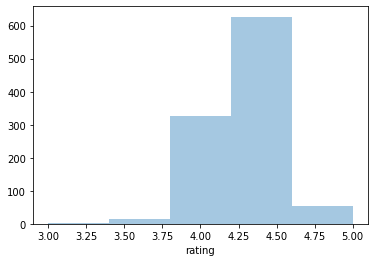

In [30]:
# Let's start by plotting histograms of general food rating and fast food rating
sns.distplot(yelp_df['rating'], kde=False, bins=5);

f1 = plt.gcf()

In [31]:
# There are 5 possible ratings in our data set: 3, 3.5, 4, 4.5, and 5
yelp_df["rating"].unique()

array([4.5, 4. , 5. , 3.5, 3. ])

In [32]:
# It appears that our rating data is normal-ish and is skewed right. We have a mean of 4.358 and an std of .294.
yelp_df["rating"].describe()

count    1024.000000
mean        4.350586
std         0.296014
min         3.000000
25%         4.000000
50%         4.500000
75%         4.500000
max         5.000000
Name: rating, dtype: float64

Note that the fast food dataset doesn't have a rating column. We will need to merge the two datasets ...

In [33]:
# NOTE: do we need this cell anymore since we now have fast food ratings from fast_ratings_df?
# To get the ratings of the data found in the fast food dataset, we merge the yelp dataset (which has the ratings) with the fast food dataset 
# merged_df = fast_df
# merged_df['ratings'] = np.nan
#for i in fast_df.index:
#    for j in yelp_df.index:
#        if merged_df.at[i, 'name'] == yelp_df.at[j, 'name']:
#            if merged_df.at[i, 'address'] == yelp_df.at[j, 'address']:
#                merged_df.iloc[i].ratings = yelp_df.iloc[j].rating

#merged_df.dropna()

#print(merged_df)

In [34]:
#TODO: Explain what the merged df shows/means

In [35]:
# TODO: describe the lattitude/longitude data to see if there is any bias in geography for our 2 datasets

In [36]:
# TODO: maybe move the null row removal into the data cleanup section rather than analysis

### Testing Distributions

### Data Analysis

# Ethics & Privacy

In order to gain access to the data, we utilized several Yelp API keys at no charge. Anyone is able to  obtain the available data on Yelp, therefore we do have permission to use it. The API however does not return every business available, only the businesses that have Yelp-user generated content. In addition, we only found data for 48 states in which we’re missing the data for Arizona and Delaware. This is concerning because it excludes these populations. In addition, it seems that the restaurants listed in the yelp dataset do not include all ethnic groups (ex: there are no Korean restaurants listed). Furthermore, there are biases in our dataset because the data (reviews) is manipulated by Yelp and does not reflect the overall ratings of everyone who has written a review. In terms of privacy, our project should not have any major concerns as we are using information that has been released to the public, all which do not contain personal information. The data we are working with are on businesses, such as their location and amount of reviews. 
 
While our dataset has a potential bias, we have decided to continue on with using it. Our dataset may be missing 2 states, but we felt that missing 2 out of 50 states would not significantly change our results and analysis. One thing we must note is that we would be unable to predict the success of a restaurant if the location given were to be in Arizona or Delaware. We must also note that our prediction of a restaurant's success may be inaccurate for restaurants who identify as any of the ethnic groups not represented by the dataset. We have also decided to overlook Yelp’s manipulation of the reviews because it is also a factor that plays a role in the success or failure of a business, as mentioned in the Background and Prior Work section. In addition, there is little we can do about Yelp’s manipulation of data, as we only have permission to data that Yelp has legally consented to publicizing. 


# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions